In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import serial

import glob
import msvcrt
import winsound

import time
import os
import shutil
import sys
from datetime import datetime
print(sys.version)
print(sys.executable)

3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
C:\Users\Combes4\Anaconda2\envs\nectarLearn\python.exe


In [2]:
# list ports

def serial_ports():
    """ Lists serial port names

        :raises EnvironmentError:
            On unsupported or unknown platforms
        :returns:
            A list of the serial ports available on the system
    """
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')

    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result


# I'm using COM3 and COM5 arduinos
# COM4 is for the arduino controlling the cameras
serial_ports()

['COM8']

In [3]:
# connect 
PORT1 = "COM8"
connected1 = False
if "ser1" in globals():
    ser1.close()
ser1 = serial.Serial(PORT1,9600, timeout=1.0) # stop if no data comes in 1 second
while not connected1:
    serin1 = ser1.read()
    connected1 = True
    print("connected to arduino on " + PORT1)
str(ser1.readline().decode("UTF-8"))    

connected to arduino on COM8


' Setup complete\r\n'

In [63]:
for ii in range(20): 
    written = ser1.write("f".encode("utf-8"))


In [32]:
ser1.write("f".encode("utf-8"))

1

In [25]:
for ii in range(100): 
    written = ser1.write("b".encode("utf-8"))

In [24]:
"c".encode("utf-8")
int.from_bytes(b'c', byteorder='big') # this is what the arduino will see

99

In [26]:
int.from_bytes(b'c', byteorder='big')

99

In [64]:
ser1.write("c".encode("utf-8"))

1

In [65]:
def readData(serial_con, readlen = 500, wait_time = 0):
    tmp = []
    while msvcrt.kbhit():
        msvcrt.getch()
        print('clearing characters ...')
    
    for ii in range(readlen):
        serial_con.write("r".encode("utf-8"))
        txt = serial_con.readline().decode("UTF-8")
        values = [int(i) for i in txt.split(',')]
        values.append(datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f'))
        tmp.append(np.array(values))
        time.sleep(wait_time)
        
        if msvcrt.kbhit(): # if q is pressed, then break
            k = msvcrt.getch()
            if(k == b'q') | (k == b'\x1b') | (k == b'\x0b') :
                print("keyboard break")
                winsound.MessageBeep()
                break
    return(np.array(tmp))
    

In [66]:
# read data and write to file with timestamp
tt = readData(ser1, readlen=1000, wait_time=0.01)

In [154]:
# saveData
saveDir = r"C:/Users/Combes4/Desktop/NectarPrelim2"

df1 = pd.DataFrame(tt, columns=["base_sensor", "mid_sensor", "top_sensor", "limit_1", "limit_2", "timestamp"])
#df1.to_csv(os.path.join(saveDir, datetime.now().strftime('%Y-%m-%d__%H_%M_%S_%f') + ".csv"), index = False)

In [155]:

# for com7
df1[["base_sensor", "mid_sensor", 
     "top_sensor", "limit_1", "limit_2"]] = \
    df1[["base_sensor", "mid_sensor", 
        "top_sensor", "limit_1", "limit_2"]].astype(int)

df1.head()

,base_sensor,mid_sensor,top_sensor,limit_1,limit_2,timestamp
0,1022,523,308,0,0,2018-12-07 15:04:20.331829
1,1022,519,304,0,0,2018-12-07 15:04:20.350817
2,1022,519,304,0,0,2018-12-07 15:04:20.370834
3,1022,519,304,0,0,2018-12-07 15:04:20.391632
4,1022,519,304,0,0,2018-12-07 15:04:20.407926


In [160]:
# for com8, switch base and mid refref, double check
df1[["mid_sensor", "base_sensor",
     "top_sensor", "limit_1", "limit_2"]] = \
    df1[["base_sensor", "mid_sensor", 
        "top_sensor", "limit_1", "limit_2"]].astype(int)

df1.head()

,base_sensor,mid_sensor,top_sensor,limit_1,limit_2,timestamp
0,523,1022,308,0,0,2018-12-07 15:04:20.331829
1,519,1022,304,0,0,2018-12-07 15:04:20.350817
2,519,1022,304,0,0,2018-12-07 15:04:20.370834
3,519,1022,304,0,0,2018-12-07 15:04:20.391632
4,519,1022,304,0,0,2018-12-07 15:04:20.407926


In [161]:
#np.array(df1.iloc[:,0].astype(int))

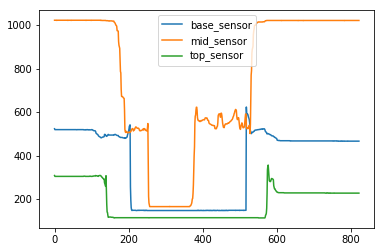

In [162]:
ax1 = df1.iloc[:, 0:3].plot()
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')  

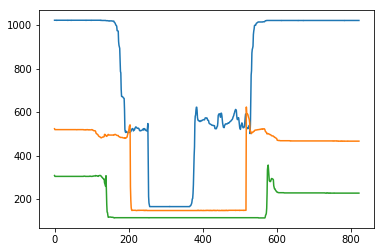

In [158]:
plt.plot(df1[["base_sensor", "mid_sensor", 
     "top_sensor"]])
plt.show()

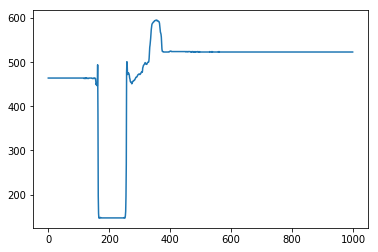

In [123]:
plt.plot(np.array(df1.iloc[:,1].astype(int)))

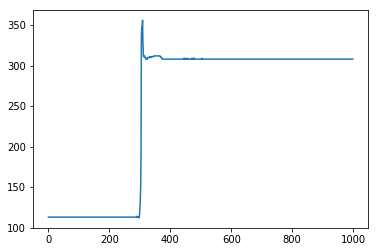

In [124]:
plt.plot(np.array(df1.iloc[:,2].astype(int)))

In [127]:
(tt[0, 5])

'2018-12-07 14:46:48.363078'

In [40]:
# for com7
# top sensor
tt[:, 2]

# mid sensor
tt[:, 1]

# base sensor
tt[:, 0]

array([419, 420, 421, 421, 421, 421, 421, 422, 422, 423, 425, 426, 427,
       427, 428, 428, 429, 429, 429, 429, 429, 429, 428, 428, 428, 428,
       428, 429, 429, 430, 431, 432, 433, 434, 435, 436, 437, 437, 437,
       439, 438, 438, 438, 438, 438, 438, 438, 438, 437, 436, 435, 435,
       435, 436, 436, 437, 431, 427, 417, 414, 415, 416, 419, 420, 413,
       387, 388, 388, 388, 388, 388, 387, 386, 385, 385, 383, 385, 387,
       393, 392, 397, 399, 393, 404, 412, 413, 420, 425, 429, 432, 434,
       435, 436, 437, 437, 438, 438, 439, 439, 439])

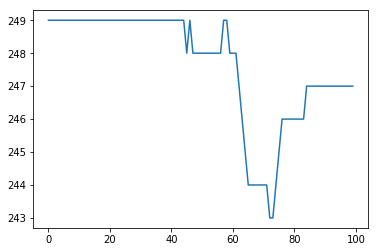

In [41]:
plt.plot(tt[:,2])

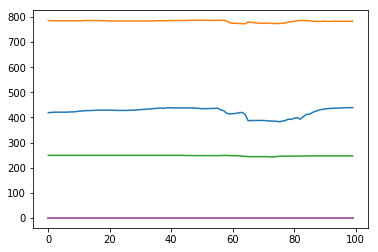

In [42]:
plt.plot(tt)

In [14]:
#ser1.close()

In [43]:
def moveToTop(serial_con, cutoff = 650):
    # refref: may want to go 1 or two more moves forward after cutoff is passed --- 
    ## the cutoff is the meniscus
    [[topVal, bottomLim, topLim]] = readData(serial_con, 1, 0)[:, [1,3,4]]
    print(topVal)
    while (topVal > cutoff) and not topLim:
        #move forward
        ser1.write("f".encode("utf-8"))
        
        # read data again
        [[topVal, bottomLim, topLim]] = readData(serial_con, 1, 0)[:,[1,3,4]]
        # rror if limit switch is hit
        if topLim:
            raise RuntimeError('Hit upper limit switch')
        
        
        
        

In [44]:
# refref: problem -- liquid stays stuck on the sides -- may need to move back slower

def moveBack(serial_con, cutoff = 650):
    
    [[topVal, bottomLim, topLim]] = readData(serial_con, 1, 0)[:, [1,3,4]]
    
    
    while (topVal < cutoff) and not bottomLim:
        #move backward
        for jj in range(7):
            ser1.write("b".encode("utf-8"))
            time.sleep(0.3)
        
        # read data again
        [[topVal, bottomLim, topLim]] = readData(serial_con, 1, 0)[:, [1,3,4]]
        # rror if limit switch is hit
        if bottomLim:
            raise RuntimeError('Hit lower limit switch')

In [45]:
readData(ser1, 1, 0)

array([[452, 773, 247,   0,   0]])

In [51]:
moveToTop(ser1)
readData(ser1, 1, 0)

764


array([[145, 308, 243,   0,   0]])

In [50]:
moveBack(ser1)
readData(ser1, 1, 0)

array([[427, 763, 245,   0,   0]])

In [83]:
ser1.write("f".encode("utf-8"))

1

In [ ]:
[[vals, bottomLim, topLim]] = readData(ser1, 1, 0)[:, 2:]

In [ ]:
readData(ser1, 1, 0)[:, 2:]

In [ ]:
toplim = 1

In [ ]:
not toplim